In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')
import string

In [3]:
df=pd.read_csv("SMSSpamCollection.csv",sep="\t",names=["label","text"])
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


This shows that there is no "na"(missing) value in the dataset. so there is no need of modification due to "na" values.

If there exits any missing value in the dataset. Use
df.dropna(how='any',inplace=True,axis=1)

In [6]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

# Adding new cloumns for more features.

1. Adding a new column for representing target in numerical form.

In [8]:
df['target'] = df["label"].map({'ham':0, 'spam':1})

In [9]:
df.head()

,label,text,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


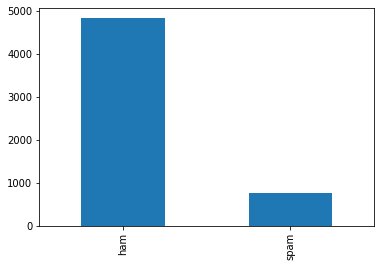

In [10]:
df["label"].value_counts().plot.bar()

2. Adding new column for length of text column.

In [11]:
df["length"]=df["text"].apply(len)

In [12]:
df.head()

,label,text,target,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Detailed data for ham messages.

In [13]:
df[df["target"]==0].describe()

,target,length
count,4825.0,4825.000000
mean,0.0,71.482487
std,0.0,58.440652
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,93.000000
max,0.0,910.000000


From the above table, we can see that maximum length of a ham message is 910.




Detailed data for spam messages.

In [14]:
df[df["target"]==1].describe()

,target,length
count,747.0,747.000000
mean,1.0,138.670683
std,0.0,28.873603
min,1.0,13.000000
25%,1.0,133.000000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,223.000000


From the above table, we can see that maximum length of a spam message is 223.

# Making WordCloud for Spam and Ham messages.

In [15]:
from wordcloud import WordCloud

In [16]:
spam_ = df[df["target"] == 1]["text"]
ham_= df[df["target"] == 0]["text"]

spam_words = []
ham_words = []

# Since this is just classifying the message as spam or ham, we can use isalpha(). 


def extractSpamWords(spamMessages):
    global spam_words
    words = [word.lower() for word in word_tokenize(spamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    spam_words = spam_words + words
    
def extractHamWords(hamMessages):
    global ham_words
    words = [word.lower() for word in word_tokenize(hamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    ham_words = ham_words + words

spam_.apply(extractSpamWords)
ham_.apply(extractHamWords)

0       None
1       None
3       None
4       None
6       None
        ... 
5565    None
5568    None
5569    None
5570    None
5571    None
Name: text, Length: 4825, dtype: object

Spam WordCloud

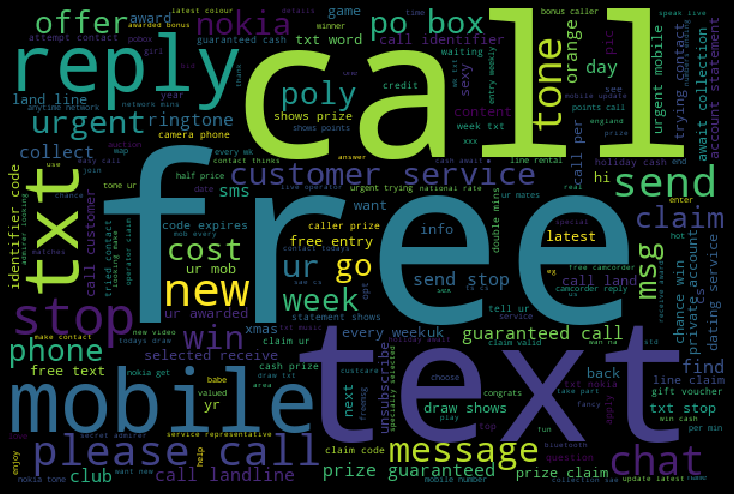

In [17]:
spam_wordcloud = WordCloud(width=600, height=400).generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Ham WordCloud

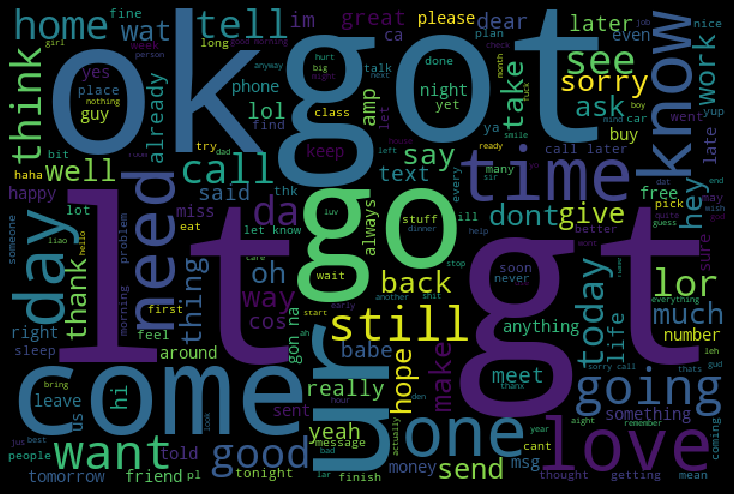

In [18]:
ham_wordcloud = WordCloud(width=600, height=400).generate(" ".join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

For Top 10 Spam Words

In [19]:
spam_words = np.array(spam_words)
print("Top 10 Spam words are :")
pd.Series(spam_words).value_counts().head(10)

Top 10 Spam words are :


call      346
free      217
txt       156
u         145
ur        144
mobile    123
text      121
stop      118
claim     113
reply     104
dtype: int64

For Top 10 Ham Words

In [20]:
ham_words = np.array(ham_words)
print("Top 10 Ham words are :")
pd.Series(ham_words).value_counts().head(10)

Top 10 Ham words are :


u       991
gt      318
lt      316
get     302
go      249
ur      247
ok      247
got     245
know    235
like    233
dtype: int64

In [21]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english')
    for word in mess:
        if word.isalpha() == False or len(word) == 1:
            STOPWORDS.append(word)
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [22]:
df['clean_text'] = df["text"].apply(text_process)

In [23]:
df.head()

,label,text,target,length,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis great wo...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah dont think goes usf lives around though


In [24]:
spam_ = df[df["target"] == 1]["clean_text"]
ham_= df[df["target"] == 0]["clean_text"]

spam_w = []
ham_w = []

# Since this is just classifying the message as spam or ham, we can use isalpha(). 


def extractSpamWords(spamMessages):
    global spam_w
    words = [word.lower() for word in word_tokenize(spamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    spam_w = spam_w + words
    
def extractHamWords(hamMessages):
    global ham_w
    words = [word.lower() for word in word_tokenize(hamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    ham_w = ham_w + words

spam_.apply(extractSpamWords)
ham_.apply(extractHamWords)

0       None
1       None
3       None
4       None
6       None
        ... 
5565    None
5568    None
5569    None
5570    None
5571    None
Name: clean_text, Length: 4825, dtype: object

In [25]:
spam_w = np.array(spam_w)
print("Top 10 Spam words are :")
pd.Series(spam_w).value_counts().head(10)

Top 10 Spam words are :


call      347
free      216
txt       150
ur        144
mobile    123
text      120
stop      115
claim     113
reply     101
prize      92
dtype: int64

In [26]:
ham_w = np.array(ham_w)
print("Top 10 Ham words are :")
pd.Series(ham_w).value_counts().head(10)

Top 10 Ham words are :


im      451
get     303
ltgt    276
ok      273
dont    265
go      250
ur      246
got     244
ill     238
know    232
dtype: int64

In [27]:
from nltk.stem import WordNetLemmatizer

In [28]:
def process_email(sentence):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(sentence)
    processed_email = []
    for word in tokens:
        word = word.lower()
        lemma = lemmatizer.lemmatize(word)
        processed_email.append(lemma)
    return processed_email

stoplist = stopwords.words('english')

def create_features(text):
    return [word for word in process_email(text) if not word in stoplist]


In [29]:
df["feature1"]=df["clean_text"].apply(create_features)

In [30]:
df.head()

,label,text,target,length,clean_text,feature1
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis great wo...,"[go, jurong, point, crazy, available, bugis, g..."
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni,"[ok, lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor already say,"[dun, say, early, hor, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah dont think goes usf lives around though,"[nah, dont, think, go, usf, life, around, though]"


In [31]:
df.shape

(5572, 6)

In [32]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df["clean_text"],df['target'], random_state=0)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [34]:
X_train_dtm = vect.transform(X_train)

In [35]:
X_train_dtm = vect.fit_transform(X_train)

In [36]:
X_train_dtm

<4179x8062 sparse matrix of type '<class 'numpy.int64'>'
	with 35533 stored elements in Compressed Sparse Row format>

In [37]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x8062 sparse matrix of type '<class 'numpy.int64'>'
	with 10433 stored elements in Compressed Sparse Row format>

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<4179x8062 sparse matrix of type '<class 'numpy.float64'>'
	with 35533 stored elements in Compressed Sparse Row format>

# Using Multinomial Naive Bayes

In [39]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [40]:
%time nb.fit(X_train_dtm, y_train)

Wall time: 1.99 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [41]:
y_pred_class = nb.predict(X_test_dtm)

In [42]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9856424982053122

In [43]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[1203,    5],
       [  15,  170]], dtype=int64)

In [44]:
metrics.roc_auc_score(y_test, y_pred_class)

0.9573899230356184

In [45]:
print(nb.predict(vect.transform(['I cant pick the phone right now. Pls send a message'])))

[0]


In [46]:
print(nb.predict(vect.transform(['Congratulations ur awarded $500 '])))

[1]


In [47]:
 import joblib

In [48]:
joblib.dump(nb, "ModelPrediction")

['ModelPrediction']

In [49]:
import pickle
import joblib
import tkinter as tk
from tkinter import *
from tkinter import messagebox

model = joblib.load("ModelPrediction")


def detect():
    user_input = t1.get()
    feature=model.predict(vect.transform([user_input]))
    if feature[0]==0:
        messagebox.showinfo("Result","Message is Safe ....  Not Spam......")
    else:
        messagebox.showinfo("Result","!!!!!!!Warning .... A Spam message is recived.....")

window = tk.Tk()
window.title("Spam Detection")
window.geometry('500x250')

l1= tk.Label(window, text="Enter the message", font = ('Algerian',20))
l1.place(x=100, y=20)

t1 = tk.Entry(window, width=70, border = 5)
t1.place(x=20, y=60)

b1 = tk.Button(window, text="Detect", font=('Algerian', 15), bg = "white", fg="black", command=detect)
b1.place(x=200, y=100)
b2 = tk.Button(window, text="Quit", font=("Algerian", 15), fg="red", bg = "white", command=quit)
b2.place(x=210, y=200)

window.mainloop()


In [ ]:
print(nb.predict(vect.transform(['I cant pick the phone right now. Pls send a message'])))

In [ ]:
print(nb.predict(vect.transform(['Congratulations ur awarded $500 '])))

In [ ]:
print(nb.predict(vect.transform(['free prize money.',
                                    'Happy to hear your success.'])))